#BERT Classifier

# Training the Model

In [1]:
# install transformers
!pip install --upgrade pip
!pip install --upgrade transformers
!pip install --upgrade git+https://github.com/huggingface/accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Cloning https://github.com/huggingface/accelerate to /tmp/pip-req-build-820byjzz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate /tmp/pip-req-build-820byjzz
  Resolved https://github.com/huggingface/accelerate to commit 8aa72b9748e3f0af87be414fe687364c65fb86b0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for accelerate: filename=accelerate-0.28.0.dev0-py3-none-any.whl size=287859 sha256=48b49d99ef72cf3efe4b3aed929d299e2e9d89800c38957428f9d6ffca045dde
  Stored in directory: /tmp/pip-ephem-wheel-cache-qs1n_hqc/wheels/f6/c7/9d/1b8a5ca8353d9307733bc719107acb67acdc95063bba749f

In [2]:
# importing necessary libraries
import torch, os

In [3]:
# installing transformers dataset
!pip install transformers dataset

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.28
    Uninstalling SQLAlchemy-2.0.28:
      Successfully uninstalled SQLAlchemy-2.0.28
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.


In [4]:
# using the gpu
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
# loading the movie dataset
from google.colab import files
movies = files.upload()

Saving movies.csv to movies.csv


In [6]:
# creating pandas dataframe
import pandas as pd
col_names = ["genre", "split"]
data = pd.read_csv("movies.csv", sep=";", names=col_names)
data = data.sample(frac=1, random_state=42)
data.head()

,genre,split
8826,superhero,"ruling, brother. a throne would suit you ill. ..."
3172,comedy,the hotel. you'd better go straight to the bas...
9221,western,"shooting a man, son. no, it isn't. not in my o..."
718,action,that. we've only got seven minutes. passengers...
3133,comedy,the thames men later became spinal tap and had...


In [7]:
# adding labels to the dataframe
labels = ["action", "adventure", "comedy", "drama", "fantasy", "history", "scifi", "sport", "superhero", "western"]
NUM_LABELS = len(labels)
id2label = {i:l for i,l in enumerate(labels)}
label2id = {l:i for i,l in enumerate(labels)}

In [8]:
label2id

{'action': 0,
 'adventure': 1,
 'comedy': 2,
 'drama': 3,
 'fantasy': 4,
 'history': 5,
 'scifi': 6,
 'sport': 7,
 'superhero': 8,
 'western': 9}

In [9]:
data["labels"] = data.genre.map(lambda x: label2id[x.strip()])

In [10]:
data.head()

,genre,split,labels
8826,superhero,"ruling, brother. a throne would suit you ill. ...",8
3172,comedy,the hotel. you'd better go straight to the bas...,2
9221,western,"shooting a man, son. no, it isn't. not in my o...",9
718,action,that. we've only got seven minutes. passengers...,0
3133,comedy,the thames men later became spinal tap and had...,2


In [11]:
data.genre.value_counts()

comedy       1195
superhero    1000
western      1000
action       1000
history      1000
adventure    1000
drama        1000
sport        1000
scifi        1000
fantasy       995
Name: genre, dtype: int64

<Axes: ylabel='genre'>

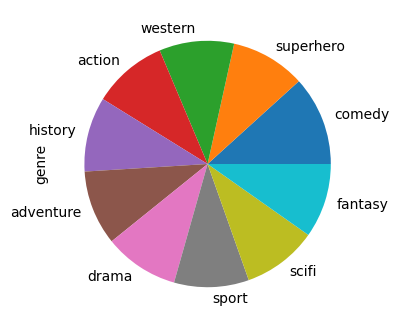

In [12]:
data.genre.value_counts().plot(kind="pie", figsize=(4,4))

In [13]:
# importing BERT tokenizer and sequence classifier
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [14]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=NUM_LABELS, id2label=id2label, label2id=label2id)
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [15]:
data = data.dropna()

In [16]:
# split the data into train, val and test sets
SIZE = data.shape[0]

train_splits  = list(data.split[:SIZE//2])
val_splits    = list(data.split[SIZE//2:(3*SIZE)//4 ])
test_splits   = list(data.split[(3*SIZE)//4:])

train_labels  = list(data.labels[:SIZE//2])
val_labels    = list(data.labels[SIZE//2:(3*SIZE)//4])
test_labels   = list(data.labels[(3*SIZE)//4:])

In [17]:
len(train_splits), len(val_splits), len(test_splits)

(5082, 2541, 2541)

In [18]:
# Is the train data balanced?
data[:5082].genre.value_counts()

comedy       606
action       527
adventure    516
fantasy      504
superhero    503
history      498
sport        492
drama        484
western      479
scifi        473
Name: genre, dtype: int64

<Axes: ylabel='genre'>

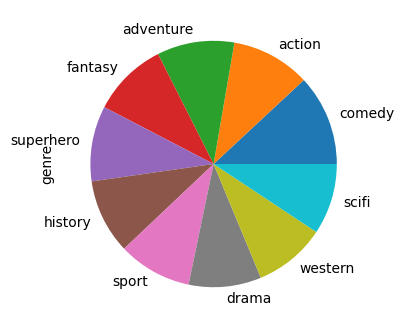

In [19]:
data[:5082].genre.value_counts().plot(kind="pie", figsize=(4,4))

In [20]:
# Is the test data balanced?
data[7623:].genre.value_counts()

comedy       295
scifi        269
western      257
sport        256
fantasy      254
superhero    249
adventure    245
action       243
history      242
drama        231
Name: genre, dtype: int64

<Axes: ylabel='genre'>

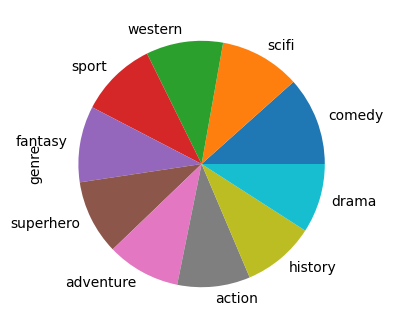

In [21]:
data[7623:].genre.value_counts().plot(kind="pie", figsize=(4,4))

In [22]:
# encode the subtitle splits
train_encodings = tokenizer(train_splits, truncation=True, padding=True)
val_encodings  = tokenizer(val_splits, truncation=True, padding=True)
test_encodings = tokenizer(test_splits, truncation=True, padding=True)

In [23]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)

In [24]:
train_dataset = MyDataset(train_encodings, train_labels)
val_dataset = MyDataset(val_encodings, val_labels)
test_dataset = MyDataset(test_encodings, test_labels)

In [25]:
# import trainer class
from transformers import TrainingArguments, Trainer

In [26]:
# define the metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'Accuracy': acc,
        'F1': f1,
        'Precision': precision,
        'Recall': recall
    }

In [27]:
# setup of the trainer
training_args = TrainingArguments(
    # The output directory where the model predictions and checkpoints will be written
    output_dir= './movies-BERT-Model',
    do_train=True,
    do_eval=True,
    #  The number of epochs, defaults to 3.0
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    # Number of steps used for a linear warmup
    warmup_steps=100,
    weight_decay=0.01,
    logging_strategy='steps',
    # TensorBoard log directory
    logging_dir='./multi-class-logs',
    logging_steps=50,
    evaluation_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    fp16=True,
    load_best_model_at_end=True
)

In [28]:
# Initializing the trainer class
trainer = Trainer(
    # the pre-trained model that will be fine-tuned
    model=model,
    # training arguments that we defined above
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics= compute_metrics
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [29]:
# Train/fine-tune the BERT classifier
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
50,2.324500,2.260295,0.151122,0.090900,0.100666,0.149446
100,2.127600,1.873972,0.380952,0.341697,0.595088,0.376642
150,1.665000,1.431206,0.562771,0.538179,0.552405,0.563139
200,1.478300,1.200861,0.626919,0.627147,0.638317,0.630729
250,1.145600,1.065124,0.658796,0.663411,0.716166,0.656873
300,1.074300,0.890790,0.744589,0.746288,0.757450,0.746186
350,0.734700,0.849360,0.740260,0.740503,0.753608,0.740262
400,0.539700,0.782173,0.760724,0.759340,0.771103,0.764647
450,0.616200,0.700458,0.789453,0.790333,0.799277,0.790741
500,0.526200,0.677864,0.795356,0.796417,0.808398,0.796004


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=1590, training_loss=0.48309765240681246, metrics={'train_runtime': 470.672, 'train_samples_per_second': 53.987, 'train_steps_per_second': 3.378, 'total_flos': 6686132138864640.0, 'train_loss': 0.48309765240681246, 'epoch': 5.0})

In [30]:
# Return a table with the scores
q=[trainer.evaluate(eval_dataset=data) for data in [train_dataset, val_dataset, test_dataset]]
pd.DataFrame(q, index=["train","val","test"]).iloc[:,:5]

,eval_loss,eval_Accuracy,eval_F1,eval_Precision,eval_Recall
train,0.044845,0.989374,0.989324,0.989282,0.989456
val,0.652748,0.842975,0.845764,0.852679,0.843874
test,0.653696,0.837859,0.839001,0.847087,0.839671


# Testing the Model

In [31]:
# define predict function to test the classifier on test data
def predict(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to("cuda")
    outputs = model(**inputs)
    probs = outputs[0].softmax(1)
    return model.config.id2label[probs.argmax().item()]

## Showtime (2002)

In [32]:
# loading the test dataset (Showtime)
test = files.upload()

Saving showtime.csv to showtime.csv


In [33]:
# create a pandas dataframe from the test data
col_names = ["genre", "split"]
test_data = pd.read_csv("showtime.csv", sep=";", names=col_names)
test_data.head()

,genre,split
0,action,being a policeman is not what you see on tv. i...
1,action,hunt you down and put you behind bars. i won't...
2,action,rights? -you should've called for backup. -my ...
3,action,gonna miss him! i'll need your gun and your sh...
4,action,-restroom on the left. -don't give up the day ...


In [34]:
# predict the genre of the splits
predictions = []

for i in range(len(test_data["split"])):
    prediction = predict(test_data["split"][i])
    predictions.append(prediction)

In [35]:
# the movie is a action comedy so the two most frequent labels should be "action" & "comedy"
from collections import Counter

counter = Counter(predictions)
most_frequent = counter.most_common(10)

print(most_frequent)

[('drama', 52), ('action', 17), ('superhero', 16), ('comedy', 9), ('sport', 5), ('adventure', 1)]


## The Equalizer 3 (2023)

In [36]:
# loading the test dataset (The Equalizer 3)
test2 = files.upload()

Saving equalizer.csv to equalizer.csv


In [37]:
# create a pandas dataframe from the test data
test_data2 = pd.read_csv("equalizer.csv", sep=";", names=col_names)
test_data2 = test_data2.dropna()
test_data2.head()

,genre,split
0,action,wait here. he told me to wait outside. let's g...
1,action,"for? you. you know who i am, then? i know what..."
2,action,are. except you're a few meters short... of wh...
3,action,dead already. he just doesn't know it yet. i f...
4,action,very low. he wouldn't have made it to the hosp...


In [38]:
# predict the genre of the splits
predictions2 = []

for i in range(len(test_data2["split"])):
    prediction2 = predict(test_data2["split"][i])
    predictions2.append(prediction2)

In [39]:
# the movie is a action drama so the two most frequent labels should be "action" & "drama"
counter2 = Counter(predictions2)
most_frequent2 = counter2.most_common(10)

print(most_frequent2)

[('action', 52), ('drama', 24), ('adventure', 10), ('western', 5), ('comedy', 3), ('scifi', 2), ('superhero', 2), ('fantasy', 1)]


# Saving the Model

In [40]:
# saving the fine tuned model & tokenizer
model_path = "movies-genre-recognizer-BERT"
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

('movies-genre-recognizer-BERT/tokenizer_config.json',
 'movies-genre-recognizer-BERT/special_tokens_map.json',
 'movies-genre-recognizer-BERT/vocab.txt',
 'movies-genre-recognizer-BERT/added_tokens.json',
 'movies-genre-recognizer-BERT/tokenizer.json')

In [41]:
# loading the model
model_path = "movies-genre-recognizer-BERT"
from transformers import pipeline, BertForSequenceClassification, BertTokenizerFast
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer= BertTokenizerFast.from_pretrained(model_path)
nlp= pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [42]:
# testing if the model recognizes the genre from short parts of the movie
nlp("being a policeman is not what you see on tv.")

[{'label': 'drama', 'score': 0.6424618363380432}]

In [43]:
nlp("same gun that put holes in your tv repair shop. it appears to be hand-held, automatic, with interchangeable magazines.")

[{'label': 'action', 'score': 0.585925281047821}]

In [44]:
nlp("you try out for the village people?")

[{'label': 'western', 'score': 0.9918754696846008}]

In [51]:
y_preds = []

#This creates a list of predictions of the Test Data without the index that causes the tokenization problem.
for i in range(len(test_splits)):
  try:
    y_preds.append(nlp(test_splits[i])[0]['label'])
  except:
    print(f"Index: {i} causes tokenization error - sentence is too long")

Index: 1669 causes tokenization error - sentence is too long


In [52]:
test_genres = []

#This creates a list of the Genres of the Test Data without the index that causes the tokenization problem.
for i in range(len(test_labels)):
  if i != 1699:
    test_genres.append(id2label[test_labels[i]])

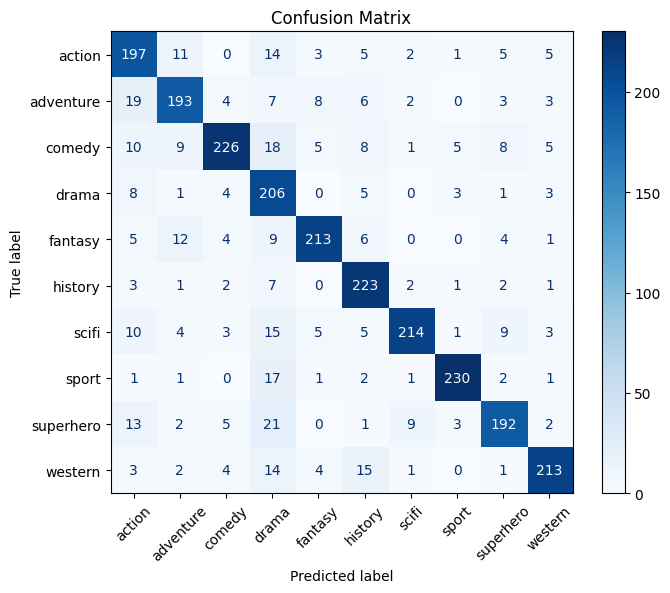

In [53]:
# creates the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = test_genres
y_pred = y_preds

fig, ax = plt.subplots(figsize=(7.5, 6))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["action", "adventure", "comedy", "drama", "fantasy", "history", "scifi", "sport", "superhero", "western"])
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)

plt.title('Confusion Matrix')
plt.show()